## Code for Producing Images in Lecture Notes

In [97]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


## Linear Regression Figures

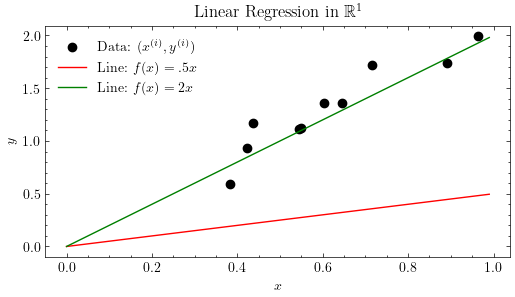

In [160]:
np.random.seed(0) # Seed randomness
plt.figure(figsize=(6, 3))

n = 10 # Number of observations
w = 2 # True parameter
X = np.random.rand(n) # x-values
y = X.dot(w).T + np.random.normal(size=n) * .2 #y-values

plt.scatter(X,y, color='black', label=r'Data: $(x^{(i)}, y^{(i)})$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
xaxis = np.arange(0,1,.01)
plt.plot(xaxis, xaxis*.5, label=r'Line: $f(x) = .5x$', color='red')
plt.plot(xaxis, xaxis*w, label=r'Line: $f(x) = 2x$', color='green')
plt.legend()
plt.title(r'Linear Regression in $\mathbb{R}^1$')
plt.savefig('images/regression_1d.pdf')

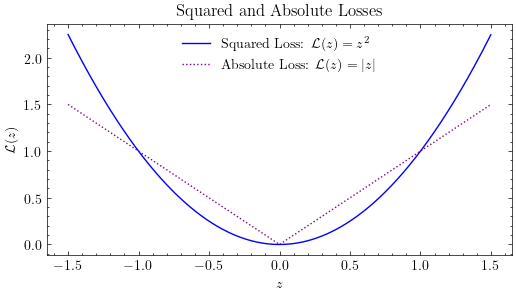

In [161]:
plt.figure(figsize=(6, 3))
plt.xlabel(r'$z$')
plt.ylabel(r'$\mathcal{L}(z)$')
xaxis = np.arange(-1.5,1.5,.001)
plt.plot(xaxis, xaxis**2, label=r'Squared Loss: $\mathcal{L}(z)=z^2$', color='blue')
plt.plot(xaxis, np.abs(xaxis), label=r'Absolute Loss: $\mathcal{L}(z)=|z|$', color='purple', linestyle='dotted')
plt.legend()
plt.title(r'Squared and Absolute Losses')
plt.savefig('images/regression_losses.pdf')

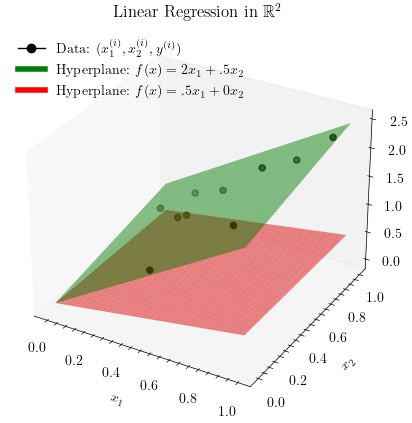

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Seed randomness
np.random.seed(1234)
n = 10  # Number of observations
w = np.array([2, .5])  # True parameter
X = np.random.rand(n, 2)  # x-values
y = X.dot(w).T + np.random.normal(size=n) * .1  # y-values

# Create figure and 3D axis
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(X[:, 0], X[:, 1], y, color='black', label=r'Data: $(x_1^{(i)}, x_2^{(i)}, y^{(i)})$')

# Hyperplane 1: Green
x1 = np.arange(0, 1, .01)
x2 = np.arange(0, 1, .01)
X1, X2 = np.meshgrid(x1, x2)
Z = w[0] * X1 + w[1] * X2
ax.plot_surface(X1, X2, Z, alpha=.5, color='green')

# Hyperplane 2: Red
ax.plot_surface(X1, X2, .5 * X1 + 0 * X2, alpha=.5, color='red')

# Labels and title
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')
ax.set_title(r'Linear Regression in $\mathbb{R}^2$')
ax.grid(False)

# Manually create custom legend handles for the surfaces
handles = [
    Line2D([0], [0], marker='o', color='black', markerfacecolor='black', markersize=6, label=r'Data: $(x_1^{(i)}, x_2^{(i)}, y^{(i)})$'),
    Line2D([0], [0], color='green', lw=4, label=r'Hyperplane: $f(x) = 2x_1 + .5x_2$'),
    Line2D([0], [0], color='red', lw=4, label=r'Hyperplane: $f(x) = .5x_1 + 0x_2$')
]

# Add legend
plt.legend(handles=handles, loc='upper left', framealpha=1)

# Save the figure
plt.savefig('images/regression_2d.pdf', bbox_inches='tight')
plt.show()


## Non-linear Regression Figures

<Figure size 400x200 with 0 Axes>

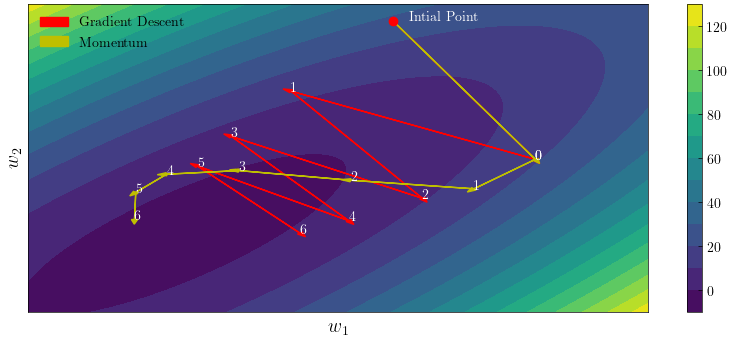

In [176]:
## Gradient descent

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import torch

%matplotlib inline

class QuadFunc:
  def __init__(self, a, b, c, d, e):
    self.a = a
    self.b = b
    self.c = c
    self.d = d
    self.e = e

  def getParams(self, x, y):
    if y is None:
      y = x[1]
      x = x[0]
    return x,y

  def __call__(self, x, y=None):
    x,y = self.getParams(x,y)
    return 0.5 * (self.a*x**2 + self.b*y**2) + self.c * x * y + self.d * x + self.e * y

  def grad(self, x, y=None):
    #df/dx = ax + cy + d
    #df/dy = by + cx + e
    x,y = self.getParams(x,y)
    return torch.tensor([self.a * x + self.c * y + self.d, self.b * y + self.c * x + self.e])

  def hess(self, x, y=None):
    #d2f/dx2 = a
    #d2f/dy2 = b
    #d2f/dxdy = c
    #d2f/dydx = c
    x, y = self.getParams(x,y)
    return torch.tensor([[self.a, self.c], [self.c, self.b]])

class GradientDescent:
    def __init__(self, lr=1, b1=0.9, b2=0.999):
        # b1 -> Momentum
        # b2 -> ADAM
        # ADAM Paper -> https://arxiv.org/abs/1412.6980
        self.lr = lr # learning rate
        self.b1 = b1 # grad aggregation param (for Momentum)
        self.b2 = b2 # grad^2 aggregation param (for ADAM)

        self.v = 0 # grad aggregation param
        self.w = 0 # grad^2 aggregation param
        self.t = 0

        self.eps = 1e-9

    def __call__(self, grad,hess):

        self.t += 1


        # aggregation
        self.v = self.b1*self.v + (1-self.b1)*grad
        self.w = self.b2*self.w + (1-self.b2)*grad**2

        # bias correction
        vcorr = self.v/(1-self.b1**self.t)
        wcorr = self.w/(1-self.b2**self.t) if self.b2 != 0 else 1

        return -1*self.lr*vcorr/(wcorr**0.5 + self.eps)

class Newtons:
    # https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization
    def __init__(self, lr=1):
        self.lr = lr

    def __call__(self,grad,hess):
        return -1*self.lr*torch.matmul(torch.inverse(hess), grad)

def runOptim(init,optim,func,steps):

    curpos = init # current position
    path = [curpos]


    for _ in range(steps):

        grad = func.grad(curpos)
        hess = func.hess(curpos)

        dx = optim(grad,hess)
        curpos = curpos + dx
        path.append(curpos)

    return path


def showPath(func,init,paths,labels,colors,levels):

    x = torch.arange(-10,10,0.05)
    y = torch.arange(-10,10,0.05)

    # create meshgrid
    xx, yy = torch.meshgrid(x,y)
    zz = func(xx,yy)

    # create contour
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    cp = ax.contourf(xx,yy,zz,levels)
    fig.colorbar(cp)

    # mark initial point
    ax.plot(init[0],init[1],'ro')
    ax.text(init[0]+0.5,init[1],'Intial Point',color='white')

    # Plot paths
    for pnum in range(len(paths)):
        for i in range(len(paths[pnum])-1):
            curpos = paths[pnum][i]
            d = paths[pnum][i+1] - curpos
            ax.arrow(curpos[0],curpos[1],d[0],d[1],color=colors[pnum],head_width=0.2)
            ax.text(curpos[0]+d[0],curpos[1]+d[1],str(i),color='white')

    # Add legend
    legends = []
    for col in colors:
        legends.append(mpatches.Patch(color=col))
    # Put legend in top left corner
    ax.legend(legends,labels, loc='upper left')


plt.figure(figsize=(4, 2))
a = 1/torch.sqrt(torch.tensor(2.0))
init = torch.matmul(torch.tensor([[a,a],[-a,a]]),torch.tensor([-5.0,7.5]))
ell = QuadFunc(a,a,-0.8*a,a,a)
steps = 7
lr = 1.5
regGD = GradientDescent(lr,0,0) # Without Momentum
momGD = GradientDescent(lr,0.9,0) # Momentum
path1 = runOptim(init,regGD,ell,steps)
path2 = runOptim(init,momGD,ell,steps)
# Set figure size
showPath(ell,init,[path1,path2],['Gradient Descent','Momentum'],['r','y'], 15)
# Turn off axis ticks
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$w_1$', fontsize=14)
plt.ylabel(r'$w_2$', fontsize=14)
plt.savefig('images/regression_momentum.pdf', bbox_inches='tight', dpi=300)

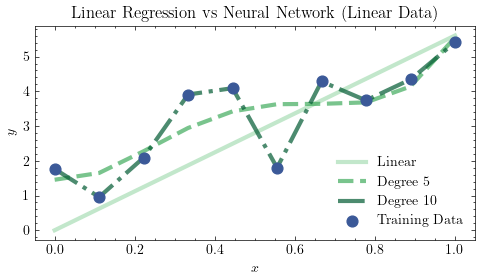

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate noisy linear data
n = 10 # Number of observations
np.random.seed(0)
X = np.linspace(0, 1, n).reshape(-1, 1)
true_slope = 5
true_intercept = 0
noise = np.random.normal(0, 1, n).reshape(-1, 1)  # Gaussian noise
y = true_slope * X + true_intercept + noise
y = y.ravel()

y_preds = {}

# Step 2: Fit linear regression model
weights = np.linalg.lstsq(X, y, rcond=None)[0]  # Get weights from least squares solution
y_preds['Linear'] = X.dot(weights).ravel()  # Recompute predictions using weights

for power in [5, 10]:
    X_powers = X ** np.arange(0, power)
    weights = np.linalg.lstsq(X_powers, y, rcond=None)[0]
    y_preds[f'Degree {power}'] = X_powers.dot(weights).ravel()

# Step 4: Plotting
plt.figure(figsize=(5, 3))

linestyles = ['-', '--', '-.']

colors = ['#a8ddb5', '#41ab5d', '#005a32']

for idx, (label, y_pred) in enumerate(y_preds.items()):
    plt.plot(X, y_pred, label=label, linewidth=3, alpha=0.7, zorder=1, linestyle=linestyles[idx], color=colors[idx])

plt.scatter(X, y, label='Training Data', marker='o', color='#3B5998', s=60, zorder=2)  # Deep Cornflower Blue

plt.legend()
plt.title('Linear Regression vs Neural Network (Linear Data)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.savefig('images/regression_overfitting.pdf', bbox_inches='tight', dpi=300)

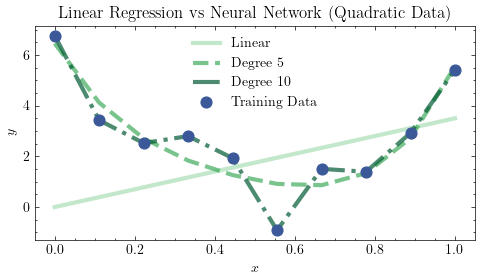

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate noisy quadratic data
n = 10 # Number of observations
np.random.seed(0)
X = np.linspace(0, 1, n).reshape(-1, 1)
true_slope = 5
noise = np.random.normal(0, 1, n).reshape(-1, 1)  # Gaussian noise
y = 20 * (X-.5)**2 + noise
y = y.ravel()

y_preds = {}

# Step 2: Fit linear regression model
weights = np.linalg.lstsq(X, y, rcond=None)[0]  # Get weights from least squares solution
y_preds['Linear'] = X.dot(weights).ravel()  # Recompute predictions using weights

for power in [5, 10]:
    X_powers = X ** np.arange(0, power)
    weights = np.linalg.lstsq(X_powers, y, rcond=None)[0]
    y_preds[f'Degree {power}'] = X_powers.dot(weights).ravel()

# Step 4: Plotting
plt.figure(figsize=(5, 3))

linestyles = ['-', '--', '-.']
colors = ['#a8ddb5', '#41ab5d', '#005a32']

for idx, (label, y_pred) in enumerate(y_preds.items()):
    plt.plot(X, y_pred, label=label, linewidth=3, alpha=0.7, zorder=1, linestyle=linestyles[idx], color=colors[idx])

plt.scatter(X, y, label='Training Data', marker='o', color='#3B5998', s=60, zorder=2)  # Deep Cornflower Blue

plt.legend()
plt.title('Linear Regression vs Neural Network (Quadratic Data)')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.savefig('images/regression_regularization.pdf', bbox_inches='tight', dpi=300)

## Logistic Regression

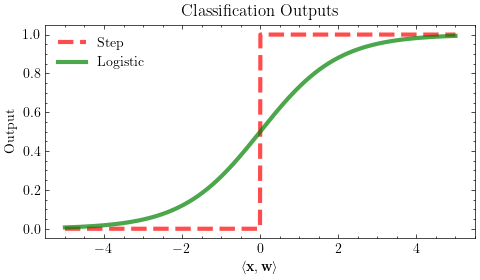

In [180]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
X = np.linspace(-5, 5, 1000).reshape(-1, 1)
ys = {}

ys['Step'] = np.where(X > 0, 1, 0)  # Step function
ys['Logistic'] = 1 / (1 + np.exp(-X))  # Logistic function

colors = ['red', 'green']
linestyles = ['--', '-']
for idx, (label, y) in enumerate(ys.items()):
    plt.plot(X, y, label=label, linewidth=3, alpha=0.7, zorder=1, linestyle=linestyles[idx], color=colors[idx])

plt.legend()
plt.title('Classification Outputs')
plt.xlabel(r'$\langle \mathbf{x}, \mathbf{w} \rangle$')
plt.ylabel(r'Output')
plt.tight_layout()
plt.savefig('images/classification_outputs.pdf', bbox_inches='tight', dpi=300)

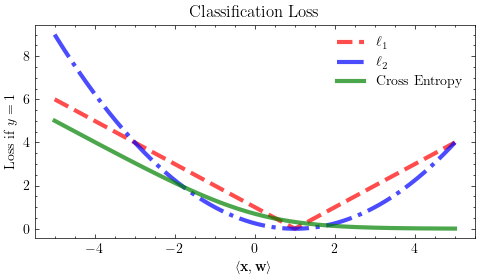

In [181]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
X = np.linspace(-5, 5, 1000).reshape(-1, 1)
ys = {}

ys[r'$\ell_1$'] = np.abs(X - 1)
ys[r'$\ell_2$'] =  (X-1)**2 /4 # Squared loss
ys['Cross Entropy'] = -np.log(1 / (1 + np.exp(-X)))  # Logistic function

colors = ['red', 'blue', 'green']
linestyles = ['--', '-.', '-']
for idx, (label, y) in enumerate(ys.items()):
    plt.plot(X, y, label=label, linewidth=3, alpha=0.7, zorder=1, linestyle=linestyles[idx], color=colors[idx])

plt.legend()
plt.title('Classification Loss')
plt.xlabel(r'$\langle \mathbf{x}, \mathbf{w} \rangle$')
plt.ylabel(r'Loss if $y=1$')
plt.tight_layout()
plt.savefig('images/classification_loss.pdf', bbox_inches='tight', dpi=300)

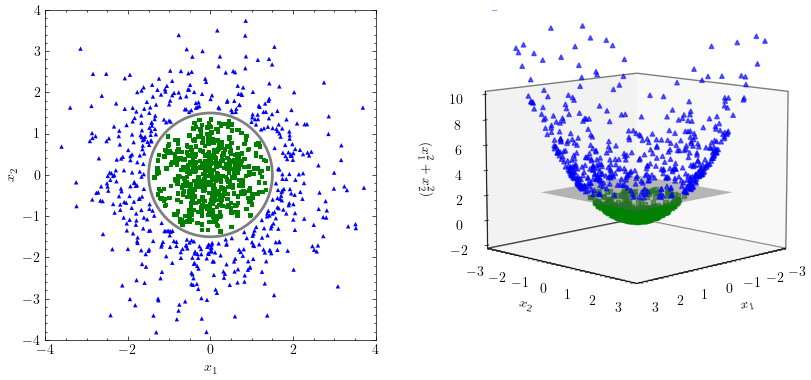

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set seed and generate balanced data
np.random.seed(42)
n = 1000

# Positive class: inside circle (radius < 1.5)
pos = np.random.normal(0, 0.8, size=(n * 2, 2))
r_pos = np.linalg.norm(pos, axis=1)
pos = pos[r_pos < 1.4][:n // 2]

# Negative class: just outside circle (radius > 1.7)
neg = np.random.normal(0, 1.2, size=(n * 2, 2))
r_neg = np.linalg.norm(neg, axis=1)
neg = neg[r_neg > 1.6][:len(pos)]

# Combine
X = np.vstack([pos, neg])
y = np.hstack([np.ones(len(pos)), np.zeros(len(neg))])

# Colors
colors = np.array(['blue', 'red'])
marker_size = 10

# Create figure
fig = plt.figure(figsize=(9, 4))

# --- 2D plot ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X[y == 0, 0], X[y == 0, 1], s=marker_size, c='blue', marker='^', edgecolors='none', label='Negative')
ax1.scatter(X[y == 1, 0], X[y == 1, 1], s=marker_size, c='green', marker='s', edgecolors='none', label='Positive')
# Decision boundary
circle = plt.Circle((0, 0), 1.5, edgecolor='gray', fill=False, linewidth=2)
ax1.add_artist(circle)

# Axis settings
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.set_aspect('equal')
#ax1.set_title("Input Space")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.tick_params(left=True, bottom=True)
for spine in ax1.spines.values():
    spine.set_visible(True)

# --- 3D plot ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Feature transformation: z = - (x1^2 + x2^2)
X3 = np.sum(X**2, axis=1)
X_3d = np.hstack([X, X3[:, np.newaxis]])

ax2.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2],
            c='blue', s=marker_size, marker='^', label='Negative', alpha=0.6)
ax2.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2],
            c='green', s=marker_size, marker='s', label='Positive', alpha=0.6)


# Separating plane: z = -2.25
x1_range = np.linspace(-2, 2, 50)
x2_range = np.linspace(-2, 2, 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
z_plane = 2.25 * np.ones_like(x1_grid)

ax2.plot_surface(x1_grid, x2_grid, z_plane, color='grey', alpha=0.5, edgecolor='none')

# View and axis cleanup
ax2.view_init(elev=25, azim=135)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.set_zlim(-20, 2)
#ax2.set_title("Transformed Feature Space")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_zlabel(r"$(x_1^2 + x_2^2)$")
ax2.grid(False)

# Adjust view and axis limits for a pointed cone effect
ax2.view_init(elev=10, azim=45)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_zlim(-2, 10)  # Compress vertical scale to make cone sharper

# Final layout adjustments
# Set white background and black cube lines for 3D plot
ax2.set_facecolor('white')
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.zaxis.pane.set_edgecolor('black')

plt.tight_layout()
plt.savefig('images/classification_transformation.pdf', dpi=300, bbox_inches='tight')
plt.show()


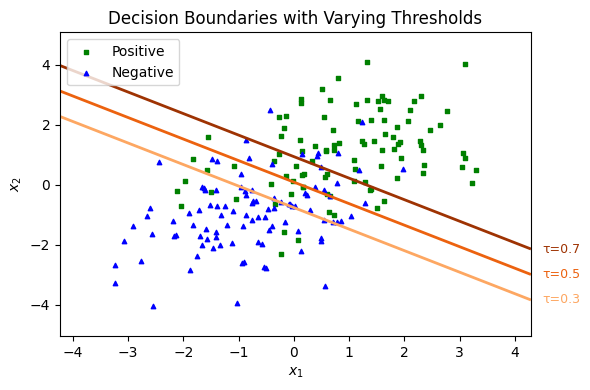

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate overlapping data
np.random.seed(0)
n = 200
mean_pos = [1, 1]
mean_neg = [-1, -1]
cov = [[1.5, 0.5], [0.5, 1.5]]

X_pos = np.random.multivariate_normal(mean_pos, cov, size=n//2)
X_neg = np.random.multivariate_normal(mean_neg, cov, size=n//2)
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(n//2), np.zeros(n//2)))

# 2. Fit logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# 3. Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# 4. Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Scatter data points
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='green', s=10, marker='s', label='Positive')
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=10, marker='^', label='Negative')


# Thresholds and colors
thresholds = [0.3, 0.5, 0.7]
import matplotlib
oranges = matplotlib.colormaps.get_cmap('Oranges')
colors = [oranges(i) for i in [0.4, 0.65, 0.9]] 

for tau, color in zip(thresholds, colors):
    CS = ax.contour(xx, yy, probs, levels=[tau], colors=[color], linewidths=2)
    
    # If there's a contour segment, label it manually
    if len(CS.allsegs[0]) > 0:
        seg = CS.allsegs[0][0]
        if len(seg) > 0:
            # Pick the right-most point (max x)
            x_text, y_text = seg[np.argmax(seg[:, 0])]
            ax.text(x_text + 0.2, y_text, f'τ={tau:.1f}',
                    color=color, fontsize=9, ha='left', va='center',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))


# Final formatting
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.set_title("Decision Boundaries with Varying Thresholds")
plt.tight_layout()
plt.savefig('images/classification_boundaries.pdf', dpi=300, bbox_inches='tight')
plt.show()


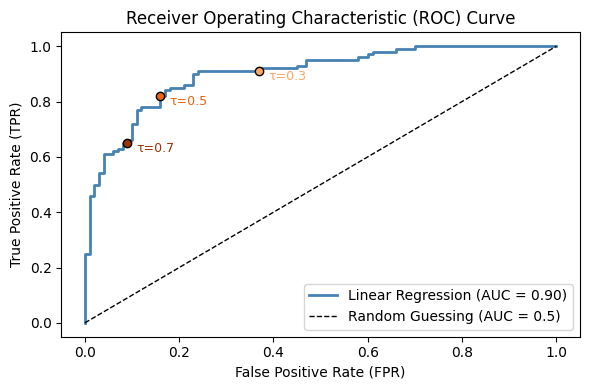

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# --- 1. Generate overlapping data ---
np.random.seed(0)
n = 200
mean_pos = [1, 1]
mean_neg = [-1, -1]
cov = [[1.5, 0.5], [0.5, 1.5]]

X_pos = np.random.multivariate_normal(mean_pos, cov, size=n//2)
X_neg = np.random.multivariate_normal(mean_neg, cov, size=n//2)
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(n//2), np.zeros(n//2)))

# --- 2. Fit logistic regression ---
clf = LogisticRegression()
clf.fit(X, y)
probs = clf.predict_proba(X)[:, 1]

# --- 3. Compute ROC curve and AUC ---
fpr, tpr, thresholds = roc_curve(y, probs)
auc = roc_auc_score(y, probs)

# --- 4. Plot ROC curve ---
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Linear Regression (AUC = {auc:.2f})", color='steelblue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guessing (AUC = 0.5)')

# --- 5. Highlight specific τ values ---
tau_values = [0.3, 0.5, 0.7]
import matplotlib
oranges = matplotlib.colormaps.get_cmap('Oranges')
colors = [oranges(i) for i in [0.4, 0.65, 0.9]] 

for tau, color in zip(tau_values, colors):
    # Find closest index in thresholds array
    idx = np.argmin(np.abs(thresholds - tau))
    plt.scatter(fpr[idx], tpr[idx], color=color, edgecolor='black', zorder=5)
    plt.text(fpr[idx]+0.02, tpr[idx]-0.02, f'τ={tau}', fontsize=9, color=color, verticalalignment='center')

# --- 6. Format plot ---
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.tight_layout()

plt.savefig('images/classification_roc.pdf', dpi=300, bbox_inches='tight')
plt.show()